# [第4章: 形態素解析](http://www.cl.ecei.tohoku.ac.jp/nlp100/#ch4)
夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt)）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39は[matplotlib](http://matplotlib.org/)もしくは[Gnuplot](http://www.gnuplot.info/)を用いるとよい．

In [1]:
!ls ../Corpus/neko.txt

../Corpus/neko.txt


In [2]:
import MeCab
from math import log
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
sns.set(style="darkgrid", context="notebook", palette="muted")

In [5]:
!mecab -d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd ../Corpus/neko.txt > Output/neko.txt.mecab

## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [7]:
sentences = []
with open("Output/neko.txt.mecab") as neko_mecab:
    sentence = []
    for line in neko_mecab:
        if line == "\n" or line == "　	記号,空白,*,*,*,*,　,　,　\n":
            continue
        elif line == "EOS\n":
            sentences.append(sentence)
            sentence = []
        else:
            # 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
            foo = line.split("\t")
            bar = foo[1].split(",")
            morpheme = {}
            morpheme["surface"] = foo[0]
            morpheme["base"] = "*" if "*\n" == bar[6] else bar[6]
            morpheme["pos"] = bar[0]
            morpheme["pos1"] = bar[1]
            sentence.append(morpheme)

## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [8]:
surfaces_verb = set()
for sentence in sentences:
    for morpheme in sentence:
        if morpheme["pos"] == "動詞":
            surfaces_verb.add(morpheme["surface"])

surfaces_verb

{'れる',
 '生える',
 '動じ',
 '伏せ',
 '冷やかす',
 '向ける',
 'せる',
 'しまお',
 '罹る',
 '見出す',
 '加える',
 '覚える',
 '覚し',
 '見れ',
 '就い',
 '待た',
 '引き抜く',
 '暮れる',
 '唱え',
 '抛',
 '求める',
 '絞',
 '重ね',
 '見',
 '追い廻し',
 '焦る',
 '余す',
 '敷い',
 '向わ',
 '告げる',
 '見縊',
 '振',
 '構える',
 '抛り出す',
 'ひるん',
 '要する',
 '引こ',
 'やる',
 'はち切れる',
 '崇め',
 '去っ',
 '来る',
 'かう',
 '遊ぶ',
 '乗せ',
 'わける',
 '引きかえそ',
 '改める',
 'いいかね',
 '巻き込ま',
 '知れ',
 '叶わ',
 'たれ',
 '見下ろし',
 '従っ',
 '傭っ',
 '取り囲ん',
 'おか',
 '開き',
 '留っ',
 'うめろ',
 'いらせられ',
 'ござい',
 '働く',
 '売り飛ばし',
 '省け',
 'ぬけ',
 '拱い',
 '売る',
 '忍ば',
 '叶え',
 'いう',
 '鳴か',
 '添え',
 '仕切っ',
 '有ん',
 '寄り添う',
 '着こなさ',
 'めさ',
 'ふかす',
 '隠れる',
 '曝し',
 '濡れる',
 '採る',
 '寝そべっ',
 'つかみ',
 'なぐる',
 '叶っ',
 '嗅ぎ',
 'だし',
 '仕上がっ',
 '掻い',
 '破れる',
 '向け',
 'よそ',
 '怪しん',
 'あきらめる',
 'あつまっ',
 '守る',
 '対し',
 '発し',
 'せろ',
 '異なる',
 '翳す',
 '詫び入る',
 '寝過ごし',
 'いれ',
 '倍し',
 '伺い',
 'わめく',
 '動かし',
 '呑み',
 'うかがう',
 '欠け',
 'つけれ',
 '離れ',
 '使いこなせ',
 '咲い',
 'こし',
 'ざんす',
 '引い',
 '切り開い',
 'れりゃ',
 '飽き',
 '撓め',
 '列ね',
 '経っ',
 '出来',
 '漲っ',
 '附し',
 '醸す',
 '尽し'

## 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [9]:
bases_verb = set()
for sentence in sentences:
    for morpheme in sentence:
        if morpheme["pos"] == "動詞":
            bases_verb.add(morpheme["base"])

bases_verb

{'れる',
 '生える',
 '浮かぶ',
 '冷やかす',
 '撲る',
 '向ける',
 '吹き払う',
 'せる',
 '罹る',
 '慮る',
 '見出す',
 '加える',
 '拗じる',
 'せく',
 '覚える',
 'さめる',
 '因る',
 '引き抜く',
 '暮れる',
 '求める',
 '焦る',
 '告げる',
 '余す',
 '仕上がる',
 '構える',
 '抛り出す',
 '要する',
 'やって退ける',
 'やる',
 'はち切れる',
 '裏返す',
 '臭う',
 'つかみ合う',
 '来る',
 'かう',
 '遊ぶ',
 'わける',
 'こらす',
 '改める',
 'のばす',
 '聳える',
 'ほかなる',
 'せまる',
 '飼う',
 'おくれる',
 '働く',
 '売る',
 '差しかかる',
 'いう',
 '取りあげる',
 '停る',
 'あつめる',
 '寄り添う',
 'ふかす',
 'しかめる',
 '隠れる',
 '濡れる',
 '採る',
 'なぐる',
 'ぬくもる',
 '読みかける',
 '省ける',
 '破れる',
 '敗れる',
 '画く',
 '思える',
 '思い返す',
 'あきらめる',
 '守る',
 'たなびく',
 'つとめる',
 '翳す',
 '異なる',
 '詫び入る',
 '寝ぼける',
 '盛る',
 '打ち立てる',
 'わめく',
 'うかがう',
 '叩き上げる',
 '備わる',
 '食い切る',
 '踏みつける',
 '焦がれる',
 '突き飛ばす',
 '寝過ごす',
 '醸す',
 '消え失せる',
 '起き直る',
 '流れる',
 '取りとめる',
 '勤まる',
 '見くびる',
 '見透かす',
 '表する',
 '儲ける',
 '奮う',
 '止める',
 '剰る',
 '並ぶ',
 '苦しむ',
 '済す',
 '並みいる',
 'ぶる',
 '魅入る',
 '合う',
 'ほる',
 '舞い込む',
 '発する',
 '拭く',
 'さばける',
 '戴く',
 '雇う',
 '罵る',
 '突き出す',
 '鑑みる',
 '下せる',
 '復する',
 '集める',
 '噴き出す',
 '引き受ける',
 '詰る',
 '見詰

## 33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

In [10]:
surfaces_noun_sa = set()
for sentence in sentences:
    for morpheme in sentence:
        if morpheme["pos"] == "名詞" and morpheme["pos1"] == "サ変接続":
            surfaces_noun_sa.add(morpheme["base"])

surfaces_noun_sa

{'左右',
 '乱入',
 '帰国',
 '通信',
 '完成',
 '想見',
 '暴行',
 '讒訴',
 '説明',
 '同意',
 '寄贈',
 '停波',
 '列席',
 '遊弋',
 '黙読',
 '寄宿',
 '首肯',
 '復命',
 '成就',
 '恐く',
 '装飾',
 '電話',
 '瞥見',
 '努力',
 '当番',
 '速断',
 '結婚',
 '点検',
 '合意',
 'お待ち',
 '潜伏',
 '凝結',
 '欠勤',
 '承認',
 '敬',
 '沈思',
 '出勤',
 '拝見',
 '巡回',
 '冷笑',
 'うんそう',
 '精読',
 '統監',
 '座禅',
 '現前',
 '狂乱',
 '托',
 '発達',
 '嘆願',
 '刺激',
 '相談',
 '恐縮',
 '口論',
 '説法',
 '過称',
 '放歌',
 '慣用',
 '出征',
 '転用',
 '沈澱',
 '専心',
 '興行',
 '蒸発',
 '製本',
 '花見',
 '益',
 '返礼',
 '朗読',
 '横断',
 '憎悪',
 '通知',
 '陪観',
 '煮物',
 '交替',
 '婚姻',
 '評価',
 '隠居',
 '享受',
 '服膺',
 '処',
 '長生き',
 '疲労',
 '実行',
 '奔走',
 '計画',
 '出入',
 '大息',
 '鼓舞',
 '判断',
 '留守',
 '歓迎',
 '注目',
 '立腹',
 '削減',
 '忠告',
 '対面',
 '揶揄',
 'ご用',
 '処理',
 '入学',
 '進捗',
 '写生',
 '手詰り',
 '快走',
 '決心',
 '廃業',
 '入浴',
 '適',
 '遊戯',
 '自称',
 '髣髴',
 '上達',
 '超絶',
 '尽力',
 '難儀',
 '看過',
 '評',
 '遠慮',
 '持参',
 '外出',
 '散歩',
 '注文',
 '妨害',
 '感嘆',
 '保証',
 '註釈',
 '弁護',
 '認識',
 '演繹',
 '看破',
 '雑談',
 '通用',
 '激',
 '発音',
 '返報',
 '連想',
 '後悔',
 '垂涎',
 '直覚',
 '流行',
 '捕獲',
 '密封',
 '想像',
 

## 34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [11]:
surfaces_noun = set()
for sentence in sentences:
    for morpheme in sentence:
        if morpheme["pos"] == "名詞":
            surfaces_noun.add(morpheme["base"])

surfaces_noun

{'年始',
 '帰国',
 '君の話',
 '君等',
 '名刺',
 '八万',
 '恵比寿',
 '牡丹餅',
 'しょう',
 '厄介',
 '懐手',
 '大兄',
 '嚥',
 '簡明',
 '台町',
 '桜',
 '変物',
 '隧道',
 '腋の下',
 '洞窟',
 '訳本',
 'あたり',
 '相談',
 '放歌',
 '吉田',
 '離合開闔',
 '阿呆',
 'しそ',
 '朗読',
 '中央',
 '策',
 '咳',
 '麓',
 '百獣',
 '系統',
 '滑らか',
 '子猫',
 '十倍',
 '必然',
 'もか',
 '天女',
 '現実',
 '写生',
 '色彩',
 '此',
 '洗いざらし',
 '何者',
 '昨夜',
 '挙止動作',
 '東京市',
 '外出',
 '一巻',
 'ごみ',
 '九月',
 'げ',
 '捕獲',
 'アルコール中毒',
 '在天',
 '語',
 '恐怖',
 '聖書',
 '発揮',
 '盛大',
 '持ち主',
 '狼藉',
 '綿',
 '欅',
 '交通',
 '眼鏡',
 'すんで',
 '雑煮',
 '憂身',
 '社員',
 '東京',
 '余り',
 '番',
 '巡り',
 '膠着',
 '返却',
 '馬琴',
 'テリヤ',
 '水の上',
 '血の道',
 '機会',
 '思いやり',
 '僂指',
 '甥',
 '連綿',
 '個月',
 '自家',
 '氏',
 '監督',
 '毒',
 '鄭',
 '情',
 '弥生',
 'いたずら',
 '若井',
 '手',
 '屋敷町',
 '従前',
 '慾',
 '上級生',
 '全書',
 'すれすれ',
 'さな',
 '饂飩',
 '拘泥',
 '便秘',
 '落し',
 '沢山',
 '不安',
 'ヵ年',
 '旅順',
 '草',
 '質',
 '希望',
 '品川',
 '気早',
 '合図',
 '小僧',
 '学問',
 'こん',
 '傾向',
 'ここいら',
 '言葉',
 '春風',
 '良夜',
 '肩身',
 'じゃあね',
 '狂瀾',
 '権勢',
 'わり',
 '光明',
 '同級生',
 '乳呑',
 '見合',
 '理野',
 '聟',
 '参酌',
 '陵

In [12]:
noun_no_nouns = set()
for sentence in sentences:
    for morpheme in sentence:
        surface = morpheme["base"]
        if "の" not in surface:
            continue
        match = re.search(r"(.*)の(.*)", surface)
        if match.group(1) in surfaces_noun and match.group(2) in surfaces_noun:
            noun_no_nouns.add(surface)

noun_no_nouns

{'うちの猫',
 'このまま',
 'この世',
 'この声',
 'この女',
 'この辺',
 'この道',
 'この間',
 'そのうち',
 'そのため',
 'そのほか',
 'そのまま',
 'その他',
 'その後',
 'その昔',
 'その歌',
 'その間',
 '一杯のビール',
 '世の中',
 '中の間',
 '亀の甲',
 '二の腕',
 '二人の女',
 '人間の声',
 '今日の天気',
 '今日の詩',
 '卒業の日',
 '君の名前',
 '君の国',
 '君の詩',
 '君の話',
 '夏の夜',
 '天の河',
 '奥の間',
 '女の子',
 '宵の口',
 '尊敬の念',
 '山の上',
 '山の芋',
 '岩の上',
 '年の功',
 '床の間',
 '思いのほか',
 '日の出',
 '春の日',
 '最後の手段',
 '月の光',
 '木の葉',
 '本来の面目',
 '松の木',
 '板の間',
 '次の間',
 '気の毒',
 '水の上',
 '池の上',
 '火の手',
 '火の車',
 '猫の恋',
 '猫の額',
 '男の子',
 '緑の黒髪',
 '腋の下',
 '腹の中',
 '自殺の方法',
 '茶の木',
 '茶の間',
 '茶碗の中',
 '血の道',
 '袖の下',
 '身の丈',
 '身の上',
 '身の毛',
 '香の物',
 '馬の骨'}

## 35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [15]:
concats_noun = set()

for sentence in sentences:
    idx = 0
    while idx < len(sentence)-1:
        if sentence[idx]["pos"] != "名詞" or sentence[idx+1]["pos"] != "名詞":
            idx += 1
            continue

        concat_noun = sentence[idx]["surface"] + sentence[idx+1]["surface"]
        idx += 2
        while idx < len(sentence) and sentence[idx]["pos"] == "名詞":
            concat_noun += sentence[idx]["surface"]
            idx += 1
        concats_noun.add(concat_noun)

concats_noun

{'東風君',
 '一蛙',
 'ガラス玉',
 '化学的変化',
 '一碗',
 '今十年',
 '大将隅',
 '大分骨',
 '物数奇',
 '二目',
 '君等',
 '黒縮緬',
 '大概ここ',
 '怪狸',
 '按腹揉療治',
 '濠端',
 '御客さん',
 'ゴシック趣味',
 '五尺',
 '○子さん',
 '狩野法眼元信',
 '婦人鉄砲',
 '十五六人令嬢',
 '利かん事',
 '大変トチメンボー',
 'ハハハハこれ',
 '約束通り',
 '女の',
 '女房なんど',
 'そげん山の芋',
 '運動せん',
 '結果病気',
 '活動図書館',
 '貴婦人方',
 '師匠さん',
 '先刻一',
 '早晩胃病',
 '一歩',
 '軍国多事征露',
 'かど地面',
 '今度限り',
 '出て午睡',
 '全智全能',
 'ここに蠅',
 '空間論',
 '野良野良',
 '一天井',
 '洗湯界',
 '多々良三平',
 '四百六十五行',
 '候由',
 '奥さんこれ',
 '通り一',
 '日本堤分署',
 '際諸君',
 'アングロサクソン民族間',
 '飯茶椀',
 '甞めて',
 '真面目そう',
 '変傍',
 'ままヴァイオリン',
 '結婚事件',
 '幾皿',
 '最前書斎',
 '咽喉笛',
 '戸迷い',
 '勘公',
 'なに二人',
 '候事',
 '落雲館',
 '離魂病',
 'その後東京',
 '殿下さま',
 '探険中',
 '大変珍重',
 '雛鶏',
 '否でも応でもさ',
 '全く文学熱',
 '客はさ',
 '限り吾輩',
 '木槿垣',
 '我もと四つ目垣',
 'おい君',
 '出して仕事',
 '大分強そうだ',
 '後架先生',
 '出かさん',
 '弊竇',
 'なあに品物',
 '二三度耳',
 '長坂橋',
 '珍語',
 '日曜以外',
 '冬帽',
 '一通り障子',
 '灯自ら',
 '百日紅',
 '毎朝無作法',
 '劈頭一番',
 '学校教員',
 '七分',
 '四五枚',
 '大分人',
 '昨日あたり',
 '苟め',
 '事件その物',
 'すべて胃病',
 '術なげ',
 '寒月東風二君',
 '女に艶書',
 '初さん',
 '双方共頭',
 'ある日

## 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [16]:
frequencies = {}

for sentence in sentences:
    for morpheme in sentence:
        base = morpheme["base"]
        if base in frequencies:
            frequencies[base] += 1
        else:
            frequencies[base] = 1

frequencies = sorted(frequencies.items(), key=lambda x:x[1], reverse=True)
frequencies

[('の', 9104),
 ('。', 7484),
 ('、', 6772),
 ('て', 6677),
 ('は', 6384),
 ('に', 6147),
 ('を', 6068),
 ('だ', 5835),
 ('と', 5474),
 ('が', 5259),
 ('た', 4194),
 ('する', 3544),
 ('「', 3231),
 ('」', 3225),
 ('ない', 2902),
 ('も', 2433),
 ('ある', 2254),
 ('で', 2082),
 ('から', 2000),
 ('いる', 1734),
 ('か', 1445),
 ('ん', 1416),
 ('云う', 1407),
 ('*', 1224),
 ('事', 1177),
 ('です', 1158),
 ('なる', 1113),
 ('ます', 1084),
 ('へ', 1033),
 ('もの', 972),
 ('君', 953),
 ('主人', 928),
 ('う', 918),
 ('ぬ', 703),
 ('よう', 687),
 ('見る', 672),
 ('ね', 647),
 ('この', 635),
 ('ば', 612),
 ('御', 595),
 ('その', 560),
 ('何', 518),
 ('よ', 501),
 ('思う', 498),
 ('吾輩', 477),
 ('来る', 457),
 ('人', 450),
 ('そう', 448),
 ('れる', 447),
 ('…', 433),
 ('じゃ', 429),
 ('これ', 397),
 ('さ', 383),
 ('それ', 370),
 ('聞く', 347),
 ('でも', 343),
 ('迷亭', 343),
 ('行く', 336),
 ('出来る', 322),
 ('時', 314),
 ('ところ', 310),
 ('まで', 304),
 ('な', 297),
 ('一', 294),
 ('方', 294),
 ('やる', 292),
 ('上', 286),
 ('寒月', 278),
 ('先生', 274),
 ('いい', 270),
 ('くらい', 269),
 ('出る', 26

## 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [17]:
data_top10 = pd.DataFrame({
    "単語": [frequencies[i][0] for i in range(10)],
    "出現頻度": [frequencies[i][1] for i in range(10)],
})
data_top10

,単語,出現頻度
0,の,9104
1,。,7484
2,、,6772
3,て,6677
4,は,6384
5,に,6147
6,を,6068
7,だ,5835
8,と,5474
9,が,5259


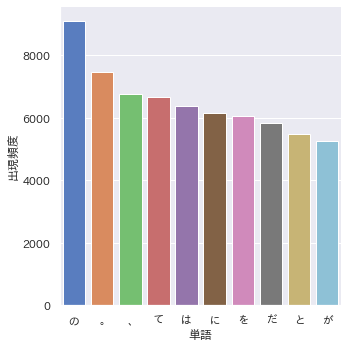

In [18]:
sns.catplot(x="単語", y="出現頻度", data=data_top10, kind="bar")

## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

In [19]:
foo = {}

for frequency in frequencies:
    if frequency[1] in foo:
        foo[frequency[1]] += 1
    else:
        foo[frequency[1]] = 1

foo = sorted(foo.items(), key=lambda x:x[0], reverse=True)

data_count = pd.DataFrame({
    "出現頻度": [bar[0] for bar in foo],
    "単語の種類数": [bar[1] for bar in foo],
})
data_count.head(10)

,出現頻度,単語の種類数
0,9104,1
1,7484,1
2,6772,1
3,6677,1
4,6384,1
5,6147,1
6,6068,1
7,5835,1
8,5474,1
9,5259,1


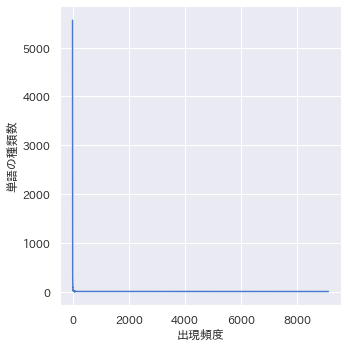

In [20]:
sns.relplot(x="出現頻度", y="単語の種類数", data=data_count, kind="line")

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

In [21]:
rank_log = []
count_log = []
count = 0
for idx, frequency in enumerate(frequencies):
    if frequency[1] != count:
        rank = idx + 1
        count = frequency[1]
        rank_log.append(log(rank))
        count_log.append(log(count))

In [22]:
data_zipf = pd.DataFrame({
    "log(出現頻度順位)": rank_log,
    "log(出現頻度)": count_log,
})
data_zipf

,log(出現頻度順位),log(出現頻度)
0,0.000000,9.116469
1,0.693147,8.920523
2,1.098612,8.820552
3,1.386294,8.806424
4,1.609438,8.761550
...,...,...
232,7.870548,1.609438
233,8.041091,1.386294
234,8.232174,1.098612
235,8.472196,0.693147


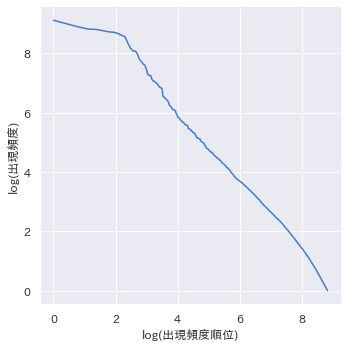

In [23]:
sns.relplot(x="log(出現頻度順位)", y="log(出現頻度)", data=data_zipf, kind="line")